In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
nodes = pd.read_csv("./data/nodes.csv")
edges = pd.read_csv("./data/edges.csv")

In [3]:
graph = nx.from_pandas_edgelist(edges, "source", "target")

In [4]:
pos_dict = {
    row["index"]: tuple(map(float, re.findall(r'\d+\.\d+', row['_pos'])))
    for _, row in nodes.iterrows()
}

nx.set_node_attributes(graph, pos_dict, 'pos')

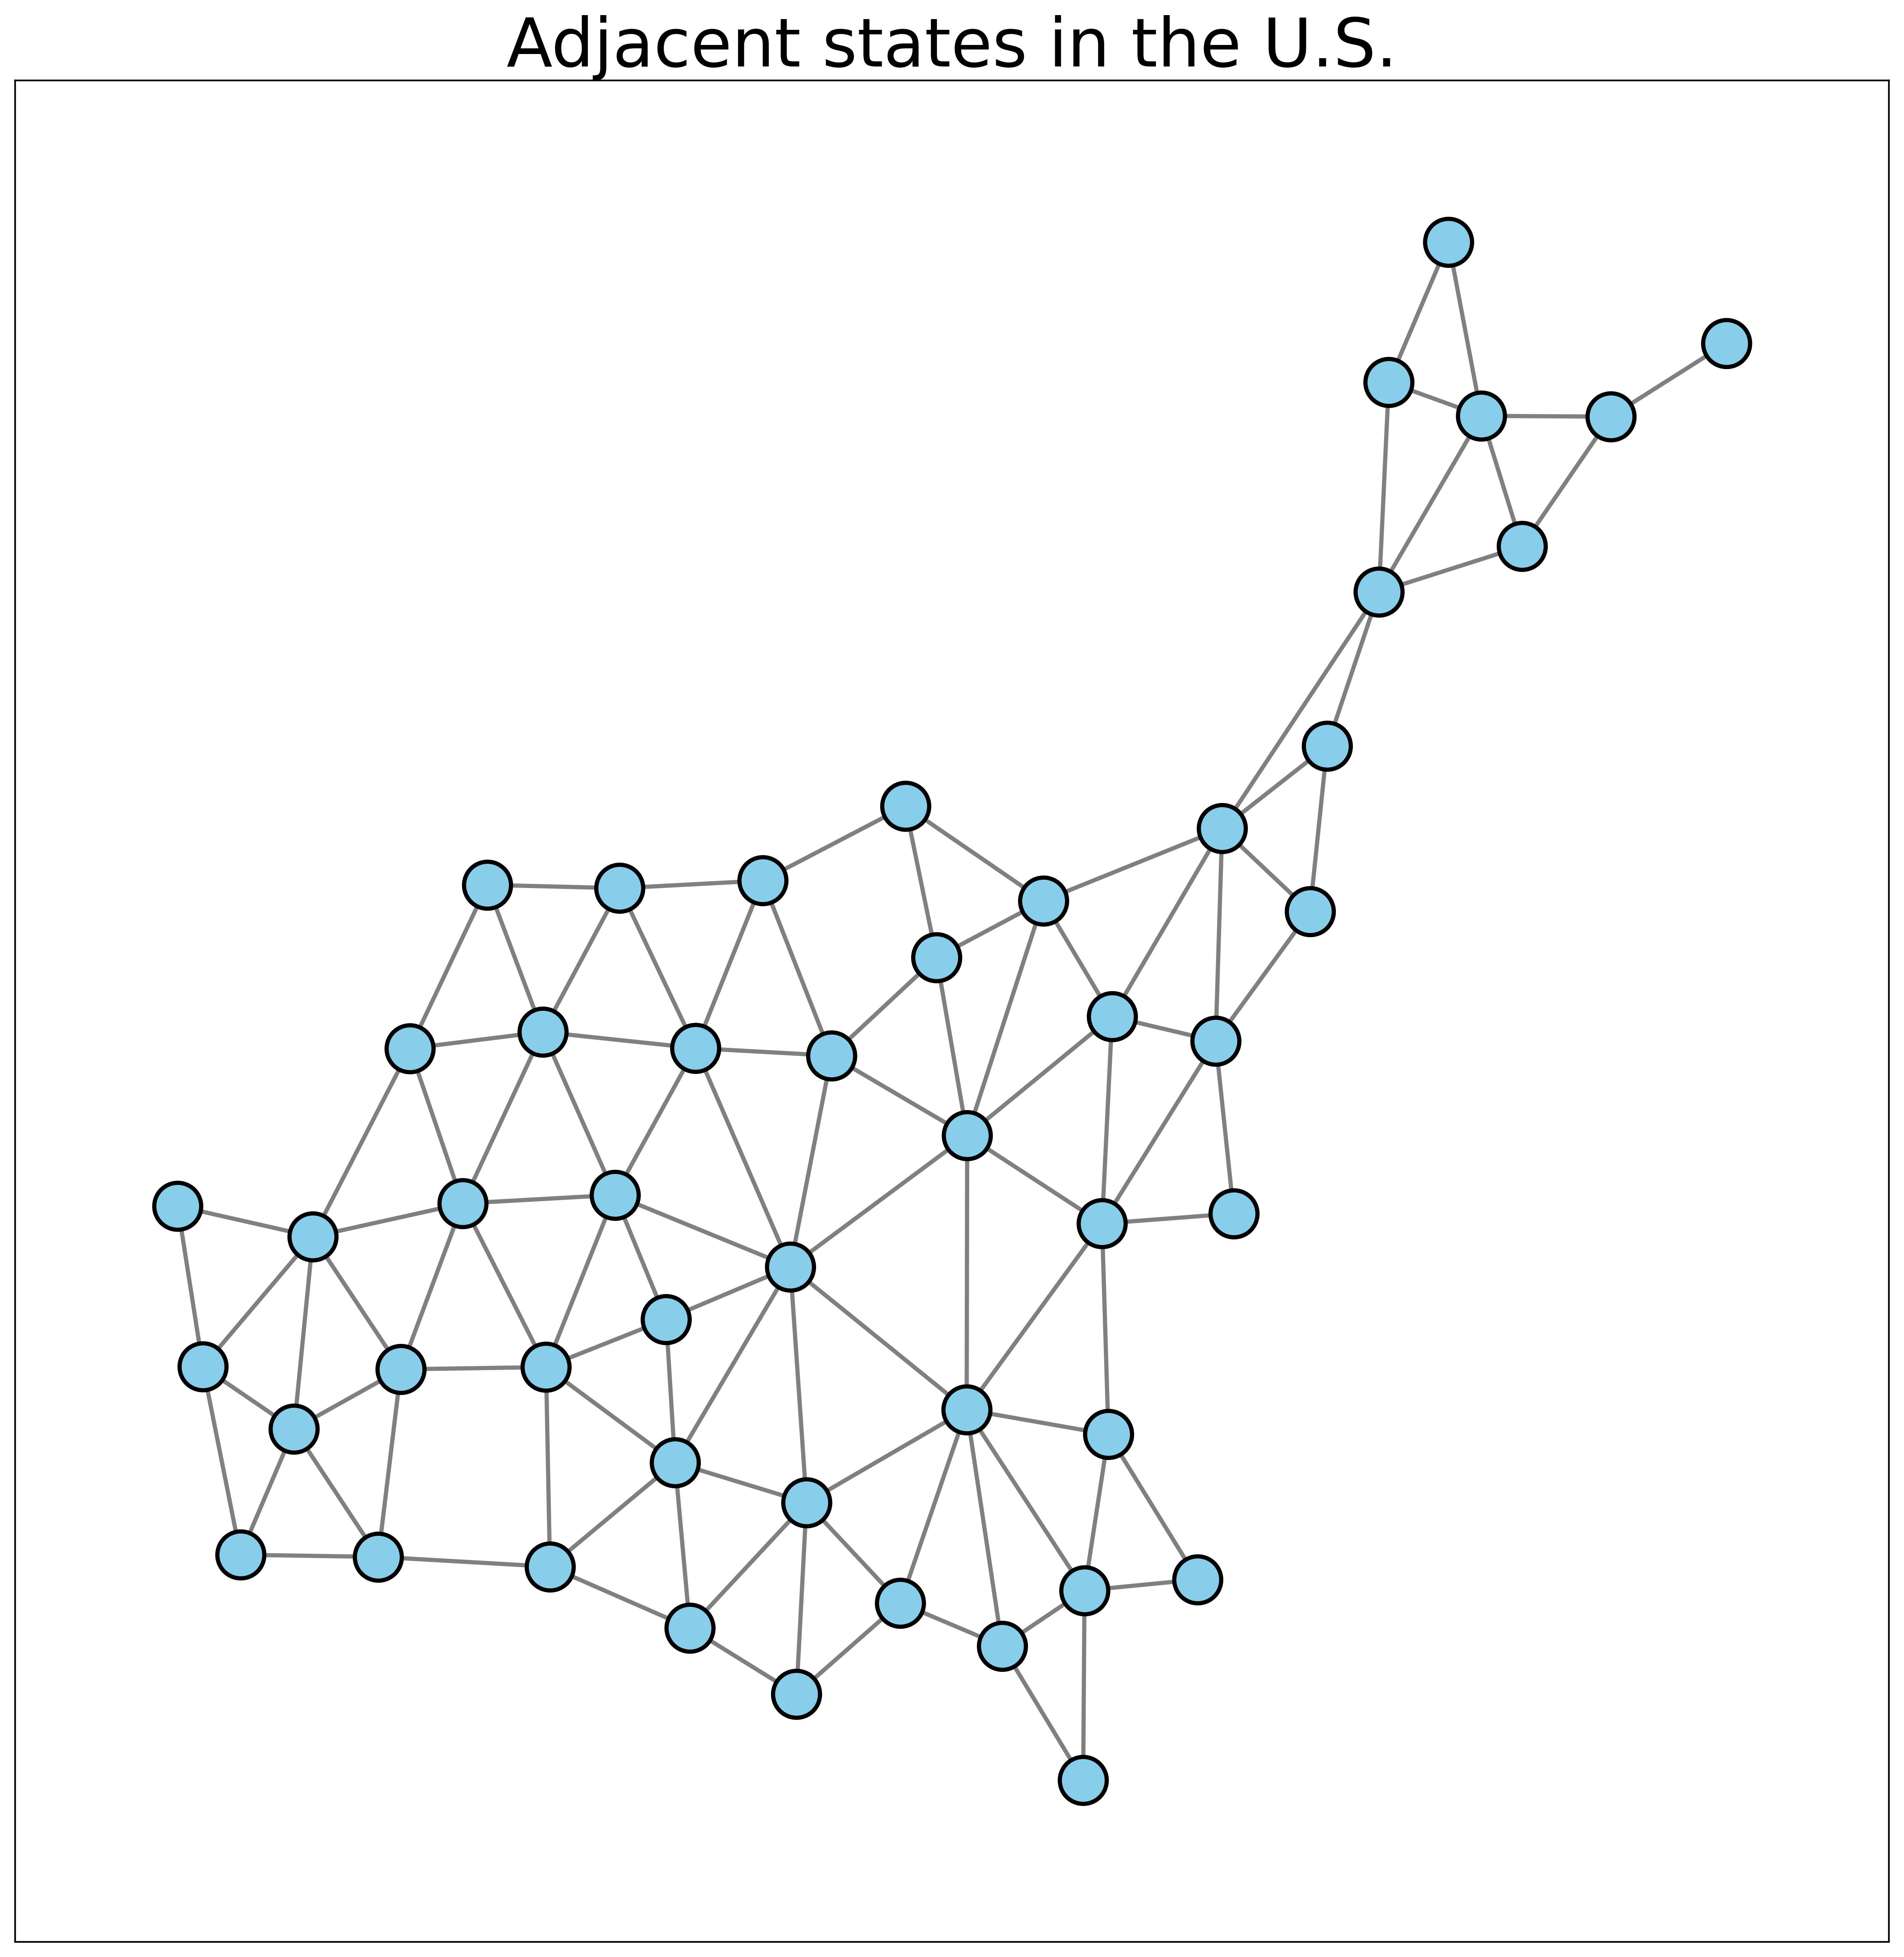

In [5]:
pos = nx.get_node_attributes(graph, 'pos')
rotated_pos = {node: (y, x) for node, (x, y) in pos.items()}

fig, ax = plt.subplots(1, 1, figsize= (16, 16), dpi = 400)

ax.set_title("Adjacent states in the U.S.", fontsize=32)

nx.draw_networkx_nodes(graph, 
    pos=rotated_pos, 
    node_size = 500,
    node_color="skyblue",
    edgecolors="black",
    linewidths=2,
    ax=ax
)

nx.draw_networkx_edges(
    graph,
    pos=rotated_pos, 
    width=2,
    edge_color="gray", 
    ax=ax,
)